In [160]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [161]:
!gdown --id 1ivd2C1F13Fk-IURoUrtw8yS6BMOnsFoy

Downloading...
From: https://drive.google.com/uc?id=1ivd2C1F13Fk-IURoUrtw8yS6BMOnsFoy
To: /content/lena.png
100% 167k/167k [00:00<00:00, 20.7MB/s]


In [244]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)
print(img.shape)
# img = cv2.imread('img.jpeg',cv2.IMREAD_GRAYSCALE)
# print(img.shape)

(512, 512)


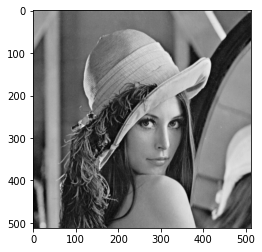

In [245]:
plt.imshow(img, cmap ='gray')
plt.show()

In [246]:
def Gaussian_function(x,y):
  sigma = 1/(2*np.log(2))
  # sigma = np.sqrt(1)
  value = np.exp(-(x**2+y**2)/(2*sigma**2))/(2*np.pi*sigma**2)
  return value

In [247]:
Gaussian_kernal = np.array([[Gaussian_function(-1,-1),Gaussian_function(0,-1),Gaussian_function(1,-1)],
               [Gaussian_function(-1,0),Gaussian_function(0,0),Gaussian_function(1,0)],
               [Gaussian_function(-1,1),Gaussian_function(0,1),Gaussian_function(1,1)]])
Gaussian_kernal = Gaussian_kernal/Gaussian_kernal.sum()
print(Gaussian_kernal)
# print(Gaussian_kernal.sum())

[[0.04697132 0.12278604 0.04697132]
 [0.12278604 0.32097054 0.12278604]
 [0.04697132 0.12278604 0.04697132]]


In [248]:
det = np.zeros((img.shape[0]+2,img.shape[1]+2))
#zero_padding
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    det[i+1][j+1] = img[i][j]
print(det)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 162. 162. ... 155. 128.   0.]
 [  0. 162. 162. ... 155. 128.   0.]
 ...
 [  0.  44.  44. ... 105. 108.   0.]
 [  0.  44.  44. ... 105. 108.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [249]:
out_img = img.copy()
for i in range(1,det.shape[0]-1,1):
  for j in range(1,det.shape[1]-1,1):
    x = np.array([[det[i+1][j+1],det[i][j+1],det[i-1][j+1]],
            [det[i+1][j],det[i][j],det[i-1][j]],
            [det[i+1][j-1],det[i][j-1],det[i-1][j-1]]])
    out_img[i-1][j-1] = round(np.sum(np.multiply(x,Gaussian_kernal)))

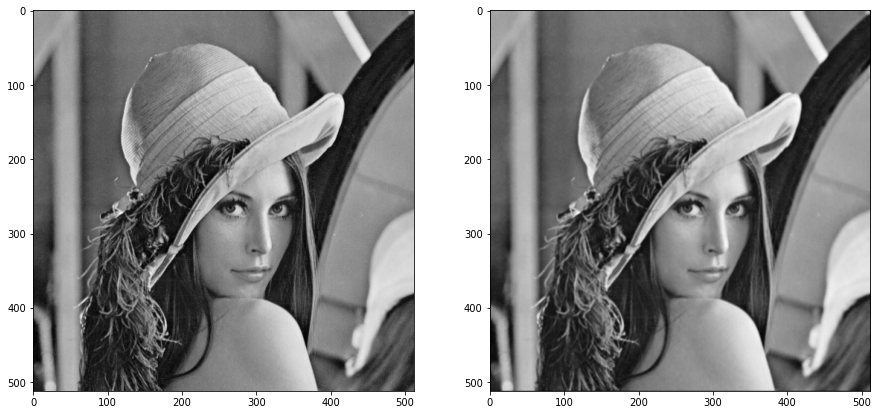

In [250]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out_img,cmap='gray')
plt.show()

In [251]:
Gaussian_padding = det.copy()
#zero_padding
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    Gaussian_padding[i+1][j+1] = out_img[i][j]
print(Gaussian_padding)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  99. 127. ... 119.  83.   0.]
 [  0. 127. 162. ... 152. 106.   0.]
 ...
 [  0.  34.  46. ... 104.  82.   0.]
 [  0.  27.  36. ...  83.  66.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [252]:
y_kernal = np.array([[-1/2,0,1/2]])
x_kernal = np.array([[-1/2,0,1/2]]).T
print(x_kernal.shape)
print(y_kernal.shape)

(3, 1)
(1, 3)


In [253]:
y_edge_img = img.copy()

for i in range(1,det.shape[0]-1,1):
  for j in range(1,det.shape[1]-1,1):
    y = np.array([[det[i][j-1],det[i,j],det[i][j+1]]])
    pixel = np.sum(np.multiply(y,y_kernal))
    y_edge_img[i-1][j-1] = pixel

In [254]:
x_edge_img = img.copy()

for i in range(1,det.shape[0]-1,1):
  for j in range(1,det.shape[1]-1,1):
    x = np.array([[det[i-1][j],det[i,j],det[i+1][j]]]).T
    pixel = np.sum(np.multiply(x,x_kernal))
    x_edge_img[i-1][j-1] = pixel

In [255]:
gaussian_y_edge_img = out_img.copy()

for i in range(1,Gaussian_padding.shape[0]-1,1):
  for j in range(1,Gaussian_padding.shape[1]-1,1):
    y = np.array([[Gaussian_padding[i][j-1],Gaussian_padding[i,j],Gaussian_padding[i][j+1]]])
    pixel = np.sum(np.multiply(y,y_kernal))
    gaussian_y_edge_img[i-1][j-1] = pixel

In [256]:
gaussian_x_edge_img = out_img.copy()

for i in range(1,Gaussian_padding.shape[0]-1,1):
  for j in range(1,Gaussian_padding.shape[1]-1,1):
    x = np.array([[Gaussian_padding[i-1][j],Gaussian_padding[i,j],Gaussian_padding[i+1][j]]]).T
    pixel = np.sum(np.multiply(x,x_kernal))
    gaussian_x_edge_img[i-1][j-1] = pixel

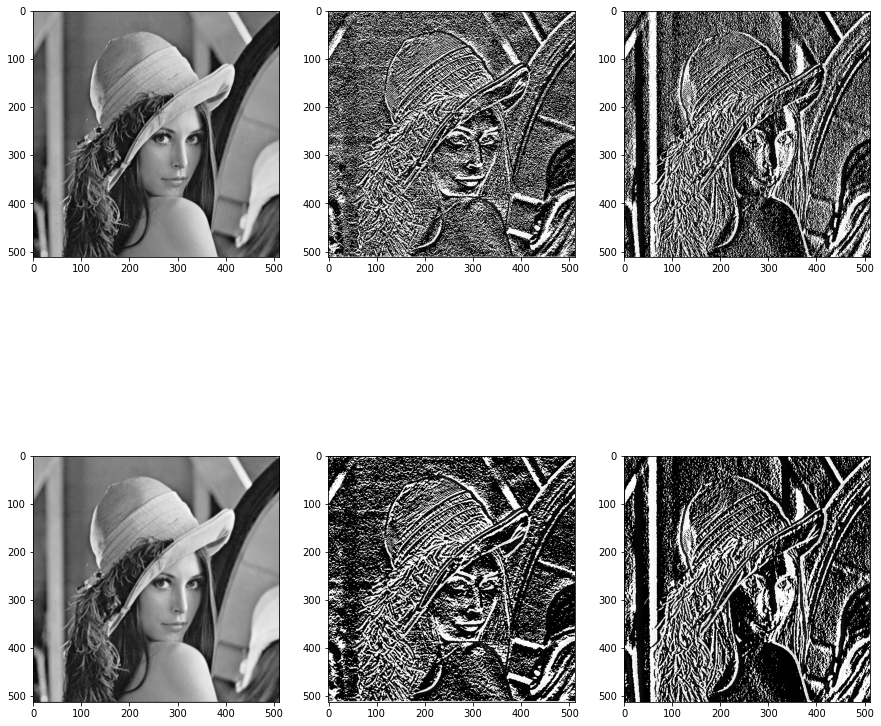

In [257]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(img,cmap='gray')
plt.subplot(2,3,2)
plt.imshow(x_edge_img,cmap='gray')
plt.subplot(2,3,3)
plt.imshow(y_edge_img,cmap='gray')

plt.subplot(2,3,4)
plt.imshow(out_img,cmap='gray')
plt.subplot(2,3,5)
plt.imshow(gaussian_x_edge_img,cmap='gray')
plt.subplot(2,3,6)
plt.imshow(gaussian_y_edge_img,cmap='gray')
plt.show()

In [296]:
gradient_img = x_edge_img.copy()
gradient_gaussian = gaussian_x_edge_img.copy()

for i in range(x_edge_img.shape[0]):
  for j in range(x_edge_img.shape[1]):
    pixel_value = round(np.sqrt((x_edge_img[i][j]**2+y_edge_img[i][j]**2)))
    if pixel_value>255:
      pixel_value = 255
    elif pixel_value<0:
      pixel_value = 0
    gradient_img[i][j] = pixel_value

for i in range(gaussian_x_edge_img.shape[0]):
  for j in range(gaussian_x_edge_img.shape[1]):
    pixel_value = round(np.sqrt((gaussian_x_edge_img[i][j] ** 2+gaussian_y_edge_img[i][j] **2)))
    if pixel_value>255:
      pixel_value = 255
    elif pixel_value<0:
      pixel_value = 0
    gradient_gaussian[i][j] = pixel_value

In [297]:
print(gradient_gaussian)
# print(y_edge_img)


[[ 89  82  81 ... 255 244 204]
 [ 82  24  17 ... 248 227 180]
 [ 81  17   0 ... 247 226 180]
 ...
 [255 255   2 ...   2 244 206]
 [254 252 252 ... 246 255 255]
 [240 233 231 ... 205 255 255]]


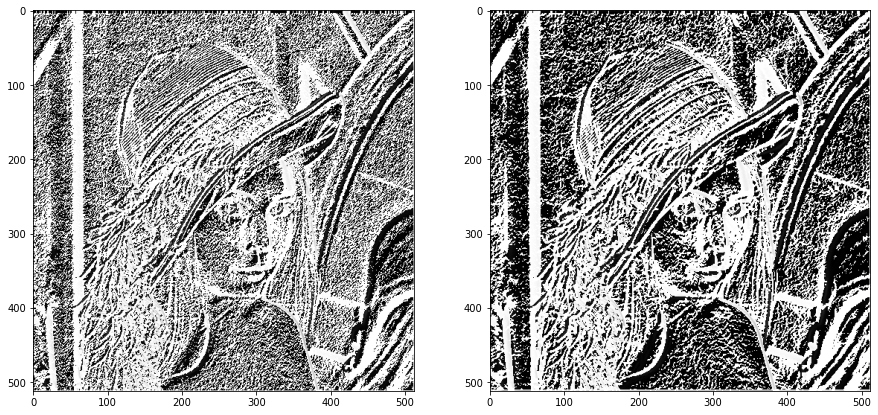

In [298]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(gradient_img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gradient_gaussian,cmap='gray')
plt.show()